In [1]:
!pip install --upgrade tensorflow tensorflow-datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 110.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 108.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 112.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.6 MB/s eta 0:00:00


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/patch_camelyon/incomplete.BFH6E0_2.0.0/patch_camelyon-test.tfrecord*...:  …

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/patch_camelyon/incomplete.BFH6E0_2.0.0/patch_camelyon-train.tfrecord*...: …

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/patch_camelyon/incomplete.BFH6E0_2.0.0/patch_camelyon-validation.tfrecord*…

Dataset patch_camelyon downloaded and prepared to /root/tensorflow_datasets/patch_camelyon/2.0.0. Subsequent calls will reuse this data.
Dataset Info:
tfds.core.DatasetInfo(
    name='patch_camelyon',
    full_name='patch_camelyon/2.0.0',
    description="""
    The PatchCamelyon benchmark is a new and challenging image classification
    dataset. It consists of 327.680 color images (96 x 96px) extracted from
    histopathologic scans of lymph node sections. Each image is annoted with a
    binary label indicating presence of metastatic tissue. PCam provides a new
    benchmark for machine learning models: bigger than CIFAR10, smaller than
    Imagenet, trainable on a single GPU.
    """,
    homepage='https://patchcamelyon.grand-challenge.org/',
    data_dir='/root/tensorflow_datasets/patch_camelyon/2.0.0',
    file_format=tfrecord,
    download_size=7.48 GiB,
    dataset_size=7.06 GiB,
    features=FeaturesDict({
        'id': Text(shape=(), dtype=string),
        'image': Image(shap

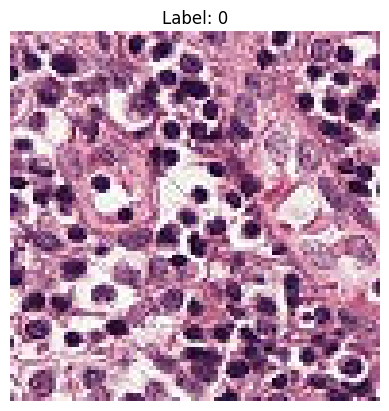

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Enable memory growth for GPUs (avoid crashes)
physical_devices = tf.config.list_physical_devices('GPU')
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

# Load PatchCamelyon dataset efficiently
(ds_train, ds_validation, ds_test), ds_info = tfds.load(
    'patch_camelyon',
    split=['train[:80%]', 'train[80%:]', 'validation'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

# Verify loaded dataset
print(f"Dataset Info:\n{ds_info}")

# Example: view a sample image
import matplotlib.pyplot as plt

def show_sample(image, label):
    plt.imshow(image.numpy())
    plt.title(f"Label: {label.numpy()}")
    plt.axis('off')

for image, label in ds_train.take(1):
    show_sample(image, label)


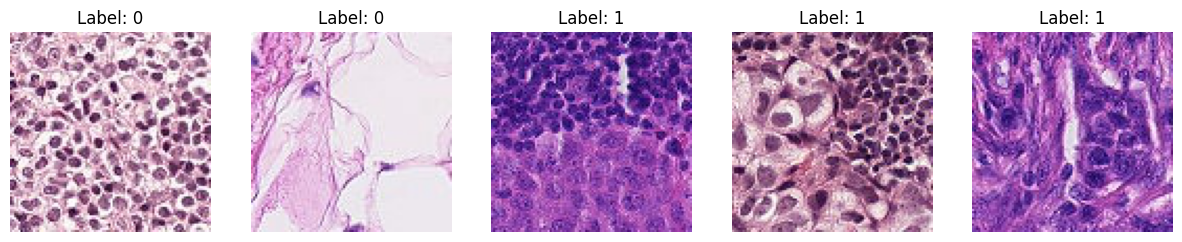

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the dataset
ds_train, ds_info = tfds.load('patch_camelyon', split='train', with_info=True, as_supervised=True)

# Display 5 sample images with labels
plt.figure(figsize=(15, 3))
for i, (image, label) in enumerate(ds_train.take(5)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(image.numpy())
    plt.title(f'Label: {label.numpy()}')
    plt.axis('off')

plt.show()


tfds.core.DatasetInfo(
    name='patch_camelyon',
    full_name='patch_camelyon/2.0.0',
    description="""
    The PatchCamelyon benchmark is a new and challenging image classification
    dataset. It consists of 327.680 color images (96 x 96px) extracted from
    histopathologic scans of lymph node sections. Each image is annoted with a
    binary label indicating presence of metastatic tissue. PCam provides a new
    benchmark for machine learning models: bigger than CIFAR10, smaller than
    Imagenet, trainable on a single GPU.
    """,
    homepage='https://patchcamelyon.grand-challenge.org/',
    data_dir='/root/tensorflow_datasets/patch_camelyon/2.0.0',
    file_format=tfrecord,
    download_size=7.48 GiB,
    dataset_size=7.06 GiB,
    features=FeaturesDict({
        'id': Text(shape=(), dtype=string),
        'image': Image(shape=(96, 96, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    dis

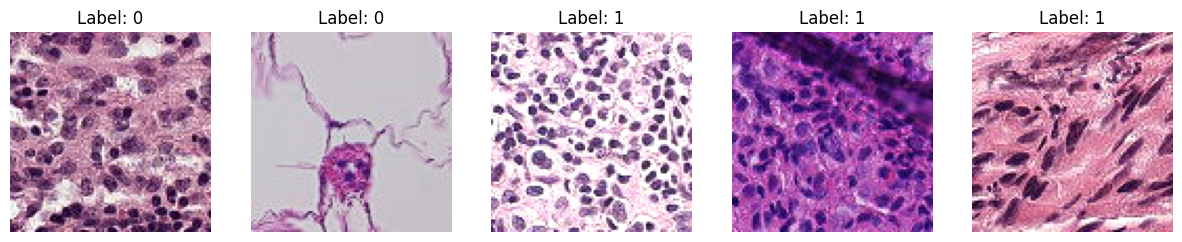

In [4]:
# Import necessary libraries
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Enable GPU memory growth to avoid runtime crashes
physical_devices = tf.config.list_physical_devices('GPU')
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

# Load PCam dataset with 80% train and 20% test split
(ds_train, ds_test), ds_info = tfds.load(
    'patch_camelyon',
    split=['train[:80%]', 'train[80%:]'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

# Verify dataset info
print(ds_info)

# Define preprocessing and augmentation functions
def preprocess(image, label):
    # Normalize images to [0, 1]
    image = tf.image.convert_image_dtype(image, tf.float32)
    # Resize images to ensure consistent input size (if required by your models)
    image = tf.image.resize(image, [96, 96])
    return image, label

# Augmentation function according to PDM plan (rotation, flip, contrast)

def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    image = tf.image.rot90(image, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
    image = tf.clip_by_value(image, 0.0, 1.0)  # Ensure pixel values are within [0,1]
    return image, label

# Apply preprocessing, augmentation, batching, caching, and prefetching
batch_size = 64

# Training dataset pipeline
ds_train = (
    ds_train
    .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    .map(augment, num_parallel_calls=tf.data.AUTOTUNE)
    .cache()
    .shuffle(1000)
    .batch(batch_size)
    .prefetch(tf.data.AUTOTUNE)
)

# Test dataset pipeline (no augmentation, just preprocessing)
ds_test = (
    ds_test
    .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(batch_size)
    .cache()
    .prefetch(tf.data.AUTOTUNE)
)

# Check a batch of training images
for images, labels in ds_train.take(1):
    plt.figure(figsize=(15, 5))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(images[i].numpy())
        plt.title(f'Label: {labels[i].numpy()}')
        plt.axis('off')
    plt.show()


In [5]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Load EfficientNet-B0 model pre-trained on ImageNet, exclude top layers
base_model = EfficientNetB0(input_shape=(96, 96, 3), include_top=False, weights='imagenet')

# Freeze base model layers
base_model.trainable = False

# Create model structure
model_efficientnet = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model_efficientnet.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

# Model summary
model_efficientnet.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 3, 3, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,050,852 (15.45 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [6]:
import tensorflow as tf
import numpy as np
import random
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',      # Monitor validation loss to detect overfitting
    patience=5,              # Stop if no improvement for 5 consecutive epochs
    restore_best_weights=True,  # Restore the best model after early stopping
    verbose=1
)

# Model checkpoint to save the best model during training
model_checkpoint = ModelCheckpoint(
    filepath='best_efficientnet_model.h5',   # Save the model with the best validation performance
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Train EfficientNet-B0 model for 20 epochs with callbacks
history_efficientnet = model_efficientnet.fit(
    ds_train,
    epochs=20,
    validation_data=ds_test,
    callbacks=[early_stopping, model_checkpoint]  # Adding callbacks
)

# Save the final model explicitly (if not already saved by ModelCheckpoint)
model_efficientnet.save('final_efficientnet_model.h5')
print("Training complete. Model saved.")


Epoch 1/20
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.5120 - auc: 0.5164 - loss: 0.6942
Epoch 1: val_loss improved from inf to 0.68773, saving model to best_efficientnet_model.h5


3277/3277 ━━━━━━━━━━━━━━━━━━━━ 613s 184ms/step - accuracy: 0.5120 - auc: 0.5164 - loss: 0.6942 - val_accuracy: 0.5912 - val_auc: 0.5514 - val_loss: 0.6877
Epoch 2/20
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.5246 - auc: 0.5362 - loss: 0.6910
Epoch 2: val_loss did not improve from 0.68773
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 578s 176ms/step - accuracy: 0.5246 - auc: 0.5362 - loss: 0.6910 - val_accuracy: 0.5665 - val_auc: 0.5509 - val_loss: 0.6891
Epoch 3/20
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.5319 - auc: 0.5420 - loss: 0.6900
Epoch 3: val_loss improved from 0.68773 to 0.68418, saving model to best_efficientnet_model.h5


3277/3277 ━━━━━━━━━━━━━━━━━━━━ 586s 179ms/step - accuracy: 0.5319 - auc: 0.5420 - loss: 0.6900 - val_accuracy: 0.5146 - val_auc: 0.5512 - val_loss: 0.6842
Epoch 4/20
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.5354 - auc: 0.5464 - loss: 0.6888
Epoch 4: val_loss did not improve from 0.68418
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 584s 178ms/step - accuracy: 0.5354 - auc: 0.5464 - loss: 0.6888 - val_accuracy: 0.5991 - val_auc: 0.5514 - val_loss: 0.6851
Epoch 5/20
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.5360 - auc: 0.5449 - loss: 0.6887
Epoch 5: val_loss improved from 0.68418 to 0.68256, saving model to best_efficientnet_model.h5


3277/3277 ━━━━━━━━━━━━━━━━━━━━ 587s 179ms/step - accuracy: 0.5360 - auc: 0.5449 - loss: 0.6887 - val_accuracy: 0.5501 - val_auc: 0.5519 - val_loss: 0.6826
Epoch 6/20
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.5330 - auc: 0.5468 - loss: 0.6883
Epoch 6: val_loss improved from 0.68256 to 0.68196, saving model to best_efficientnet_model.h5


3277/3277 ━━━━━━━━━━━━━━━━━━━━ 579s 177ms/step - accuracy: 0.5330 - auc: 0.5468 - loss: 0.6883 - val_accuracy: 0.6087 - val_auc: 0.5528 - val_loss: 0.6820
Epoch 7/20
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.5385 - auc: 0.5480 - loss: 0.6876
Epoch 7: val_loss did not improve from 0.68196
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 580s 177ms/step - accuracy: 0.5385 - auc: 0.5480 - loss: 0.6876 - val_accuracy: 0.6046 - val_auc: 0.5536 - val_loss: 0.6834
Epoch 8/20
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.5402 - auc: 0.5476 - loss: 0.6872
Epoch 8: val_loss improved from 0.68196 to 0.68162, saving model to best_efficientnet_model.h5


3277/3277 ━━━━━━━━━━━━━━━━━━━━ 577s 176ms/step - accuracy: 0.5402 - auc: 0.5476 - loss: 0.6872 - val_accuracy: 0.6132 - val_auc: 0.5540 - val_loss: 0.6816
Epoch 9/20
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.5389 - auc: 0.5497 - loss: 0.6871
Epoch 9: val_loss improved from 0.68162 to 0.68124, saving model to best_efficientnet_model.h5


3277/3277 ━━━━━━━━━━━━━━━━━━━━ 580s 177ms/step - accuracy: 0.5389 - auc: 0.5497 - loss: 0.6871 - val_accuracy: 0.6130 - val_auc: 0.5541 - val_loss: 0.6812
Epoch 10/20
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.5423 - auc: 0.5480 - loss: 0.6873
Epoch 10: val_loss improved from 0.68124 to 0.68025, saving model to best_efficientnet_model.h5


3277/3277 ━━━━━━━━━━━━━━━━━━━━ 576s 176ms/step - accuracy: 0.5423 - auc: 0.5480 - loss: 0.6873 - val_accuracy: 0.5791 - val_auc: 0.5546 - val_loss: 0.6802
Epoch 11/20
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.5452 - auc: 0.5494 - loss: 0.6864
Epoch 11: val_loss did not improve from 0.68025
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 582s 177ms/step - accuracy: 0.5452 - auc: 0.5494 - loss: 0.6864 - val_accuracy: 0.5493 - val_auc: 0.5555 - val_loss: 0.6803
Epoch 12/20
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.5437 - auc: 0.5517 - loss: 0.6863
Epoch 12: val_loss did not improve from 0.68025
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 576s 176ms/step - accuracy: 0.5437 - auc: 0.5517 - loss: 0.6863 - val_accuracy: 0.5367 - val_auc: 0.5558 - val_loss: 0.6803
Epoch 13/20
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.5447 - auc: 0.5521 - loss: 0.6860
Epoch 13: val_loss did not improve from 0.68025
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 577s 176ms/step - accuracy: 0.5447 - auc: 0.5

3277/3277 ━━━━━━━━━━━━━━━━━━━━ 581s 177ms/step - accuracy: 0.5439 - auc: 0.5523 - loss: 0.6861 - val_accuracy: 0.6124 - val_auc: 0.5572 - val_loss: 0.6800
Epoch 15/20
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.5455 - auc: 0.5534 - loss: 0.6858
Epoch 15: val_loss improved from 0.67999 to 0.67987, saving model to best_efficientnet_model.h5


3277/3277 ━━━━━━━━━━━━━━━━━━━━ 576s 176ms/step - accuracy: 0.5455 - auc: 0.5534 - loss: 0.6858 - val_accuracy: 0.5264 - val_auc: 0.5576 - val_loss: 0.6799
Epoch 16/20
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.5439 - auc: 0.5533 - loss: 0.6856
Epoch 16: val_loss improved from 0.67987 to 0.67865, saving model to best_efficientnet_model.h5


3277/3277 ━━━━━━━━━━━━━━━━━━━━ 574s 175ms/step - accuracy: 0.5439 - auc: 0.5533 - loss: 0.6856 - val_accuracy: 0.6042 - val_auc: 0.5580 - val_loss: 0.6787
Epoch 17/20
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.5466 - auc: 0.5528 - loss: 0.6856
Epoch 17: val_loss did not improve from 0.67865
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 568s 173ms/step - accuracy: 0.5466 - auc: 0.5528 - loss: 0.6856 - val_accuracy: 0.5602 - val_auc: 0.5589 - val_loss: 0.6940
Epoch 18/20
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.5488 - auc: 0.5548 - loss: 0.6850
Epoch 18: val_loss did not improve from 0.67865
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 581s 177ms/step - accuracy: 0.5488 - auc: 0.5548 - loss: 0.6850 - val_accuracy: 0.6131 - val_auc: 0.5592 - val_loss: 0.6788
Epoch 19/20
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.5436 - auc: 0.5544 - loss: 0.6857
Epoch 19: val_loss did not improve from 0.67865
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 578s 176ms/step - accuracy: 0.5436 - auc: 0.5

Training complete. Model saved.


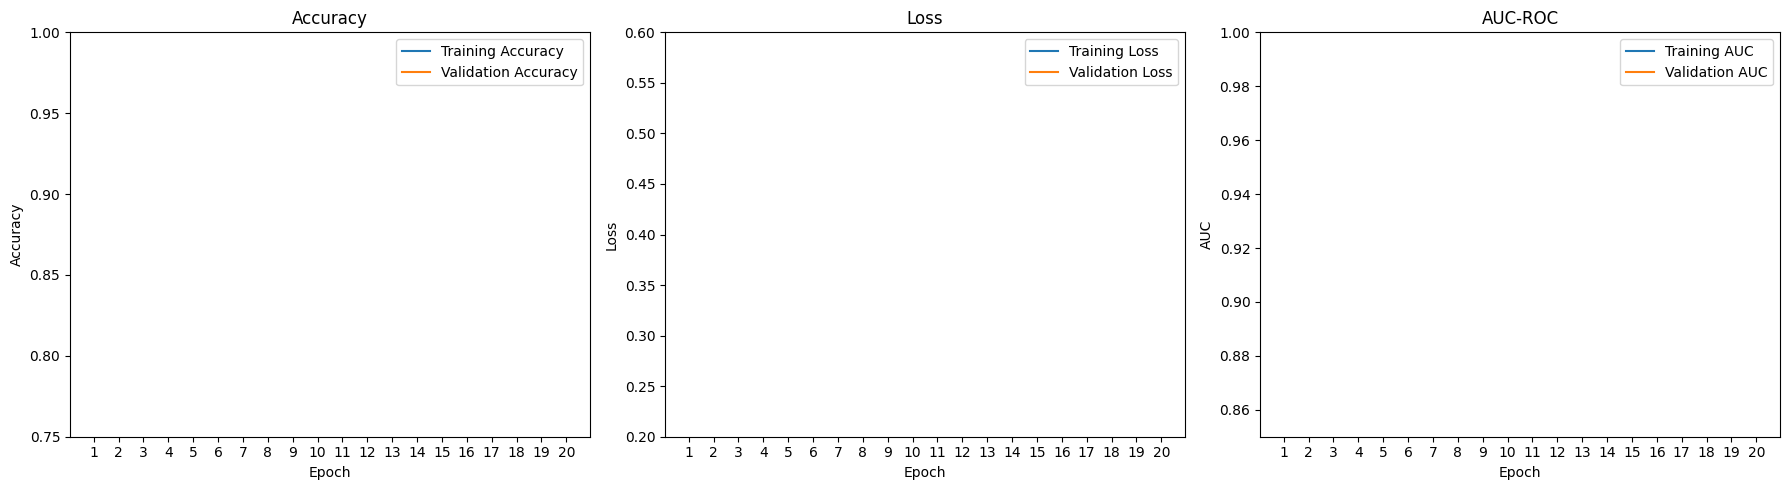

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0

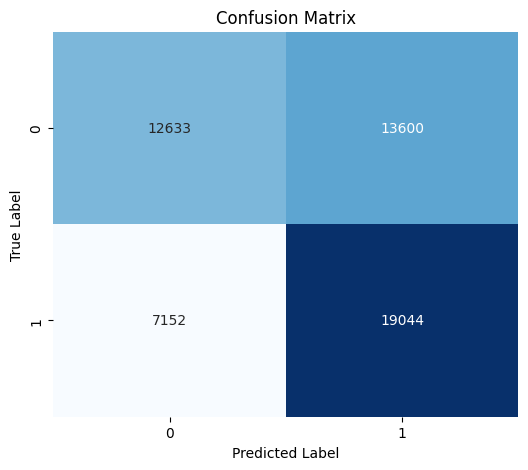

In [7]:
# Required imports for visualisation and evaluation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Plot training curves after fine-tuning
def plot_training_curves(history):
    epochs = np.arange(1, len(history.history['accuracy']) + 1)

    plt.figure(figsize=(18, 5))

    # Accuracy Plot
    plt.subplot(1, 3, 1)
    plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.xticks(np.arange(1, len(epochs) + 1, step=1))
    plt.ylim(0.75, 1.0)
    plt.legend()

    # Loss Plot
    plt.subplot(1, 3, 2)
    plt.plot(epochs, history.history['loss'], label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.xticks(np.arange(1, len(epochs) + 1, step=1))
    plt.ylim(0.2, 0.6)
    plt.legend()

    # AUC-ROC Plot
    plt.subplot(1, 3, 3)
    plt.plot(epochs, history.history['auc'], label='Training AUC')
    plt.plot(epochs, history.history['val_auc'], label='Validation AUC')
    plt.title('AUC-ROC')
    plt.xlabel('Epoch')
    plt.ylabel('AUC')
    plt.xticks(np.arange(1, len(epochs) + 1, step=1))
    plt.ylim(0.85, 1.0)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Evaluate model performance on test data
def evaluate_model(model, dataset):
    y_true, y_pred = [], []
    for images, labels in dataset:
        predictions = model.predict(images)
        predictions = np.round(predictions).astype(int).flatten()
        y_true.extend(labels.numpy())
        y_pred.extend(predictions)

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)

    print("\nEfficientNet-B0 Model Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc:.4f}")

    return y_true, y_pred

# Plot confusion matrix for evaluation
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Run these functions after fine-tuning
plot_training_curves(history_efficientnet)
y_true, y_pred = evaluate_model(model_efficientnet, ds_test)
plot_confusion_matrix(y_true, y_pred)


In [8]:
import tensorflow as tf
import numpy as np
import random
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Unfreeze the base model for fine-tuning
base_model.trainable = True

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',      # Monitor validation loss to detect overfitting
    patience=5,              # Stop if no improvement for 5 consecutive epochs
    restore_best_weights=True,  # Restore the best model after early stopping
    verbose=1
)

# Model checkpoint to save the best model during fine-tuning
model_checkpoint = ModelCheckpoint(
    filepath='best_efficientnet_finetuned.h5',   # Save the model with the best validation performance
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Recompile with a lower learning rate for stable fine-tuning
model_efficientnet.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

# Fine-tune the model for 10 additional epochs with early stopping
history_finetune_efficientnet = model_efficientnet.fit(
    ds_train,
    epochs=10,
    validation_data=ds_test,
    callbacks=[early_stopping, model_checkpoint]  # Adding early stopping and checkpoint
)

# Save the final fine-tuned model explicitly (if not saved by ModelCheckpoint)
model_efficientnet.save('final_efficientnet_finetuned.h5')
print("Fine-tuning complete. Model saved.")


Epoch 1/10
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 0s 542ms/step - accuracy: 0.7060 - auc: 0.7740 - loss: 0.8592
Epoch 1: val_loss improved from inf to 0.48201, saving model to best_efficientnet_finetuned.h5


3277/3277 ━━━━━━━━━━━━━━━━━━━━ 1910s 570ms/step - accuracy: 0.7060 - auc: 0.7741 - loss: 0.8592 - val_accuracy: 0.8000 - val_auc: 0.8829 - val_loss: 0.4820
Epoch 2/10
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 0s 518ms/step - accuracy: 0.8042 - auc: 0.8863 - loss: 0.4594
Epoch 2: val_loss improved from 0.48201 to 0.36942, saving model to best_efficientnet_finetuned.h5


3277/3277 ━━━━━━━━━━━━━━━━━━━━ 1787s 545ms/step - accuracy: 0.8043 - auc: 0.8863 - loss: 0.4594 - val_accuracy: 0.8431 - val_auc: 0.9225 - val_loss: 0.3694
Epoch 3/10
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.8415 - auc: 0.9202 - loss: 0.3683
Epoch 3: val_loss improved from 0.36942 to 0.32229, saving model to best_efficientnet_finetuned.h5


3277/3277 ━━━━━━━━━━━━━━━━━━━━ 1764s 538ms/step - accuracy: 0.8415 - auc: 0.9203 - loss: 0.3683 - val_accuracy: 0.8635 - val_auc: 0.9406 - val_loss: 0.3223
Epoch 4/10
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 0s 518ms/step - accuracy: 0.8675 - auc: 0.9406 - loss: 0.3132
Epoch 4: val_loss improved from 0.32229 to 0.28528, saving model to best_efficientnet_finetuned.h5


3277/3277 ━━━━━━━━━━━━━━━━━━━━ 1791s 547ms/step - accuracy: 0.8675 - auc: 0.9406 - loss: 0.3132 - val_accuracy: 0.8810 - val_auc: 0.9521 - val_loss: 0.2853
Epoch 5/10
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 0s 503ms/step - accuracy: 0.8852 - auc: 0.9531 - loss: 0.2772
Epoch 5: val_loss did not improve from 0.28528
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 1737s 530ms/step - accuracy: 0.8852 - auc: 0.9531 - loss: 0.2772 - val_accuracy: 0.8753 - val_auc: 0.9579 - val_loss: 0.2981
Epoch 6/10
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 0s 504ms/step - accuracy: 0.8976 - auc: 0.9618 - loss: 0.2494
Epoch 6: val_loss improved from 0.28528 to 0.24135, saving model to best_efficientnet_finetuned.h5


3277/3277 ━━━━━━━━━━━━━━━━━━━━ 1739s 531ms/step - accuracy: 0.8976 - auc: 0.9618 - loss: 0.2494 - val_accuracy: 0.9016 - val_auc: 0.9673 - val_loss: 0.2413
Epoch 7/10
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step - accuracy: 0.9079 - auc: 0.9678 - loss: 0.2285
Epoch 7: val_loss improved from 0.24135 to 0.21833, saving model to best_efficientnet_finetuned.h5


3277/3277 ━━━━━━━━━━━━━━━━━━━━ 1718s 524ms/step - accuracy: 0.9079 - auc: 0.9678 - loss: 0.2285 - val_accuracy: 0.9138 - val_auc: 0.9711 - val_loss: 0.2183
Epoch 8/10
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step - accuracy: 0.9166 - auc: 0.9725 - loss: 0.2102
Epoch 8: val_loss did not improve from 0.21833
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 1727s 527ms/step - accuracy: 0.9166 - auc: 0.9725 - loss: 0.2102 - val_accuracy: 0.9065 - val_auc: 0.9679 - val_loss: 0.2311
Epoch 9/10
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step - accuracy: 0.9231 - auc: 0.9762 - loss: 0.1950
Epoch 9: val_loss improved from 0.21833 to 0.21636, saving model to best_efficientnet_finetuned.h5


3277/3277 ━━━━━━━━━━━━━━━━━━━━ 1720s 525ms/step - accuracy: 0.9231 - auc: 0.9762 - loss: 0.1950 - val_accuracy: 0.9140 - val_auc: 0.9741 - val_loss: 0.2164
Epoch 10/10
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step - accuracy: 0.9291 - auc: 0.9793 - loss: 0.1816
Epoch 10: val_loss did not improve from 0.21636
3277/3277 ━━━━━━━━━━━━━━━━━━━━ 1727s 527ms/step - accuracy: 0.9291 - auc: 0.9793 - loss: 0.1816 - val_accuracy: 0.8966 - val_auc: 0.9708 - val_loss: 0.2579
Restoring model weights from the end of the best epoch: 9.


Fine-tuning complete. Model saved.


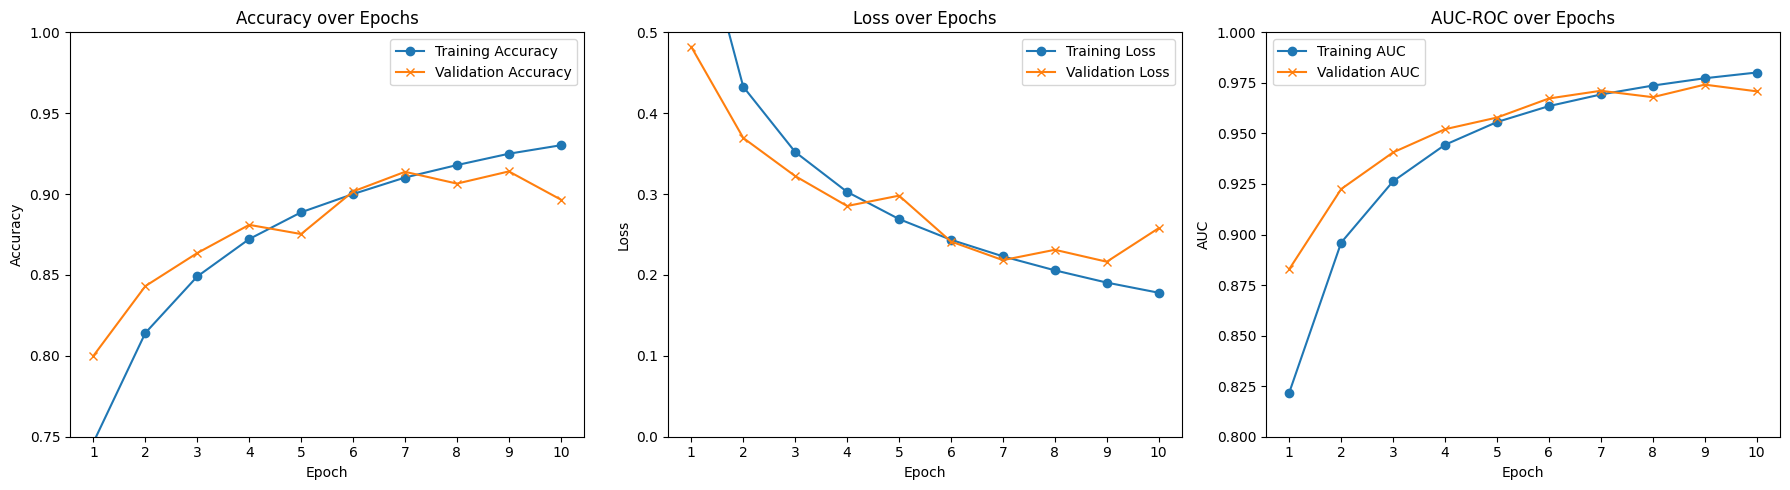

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/st

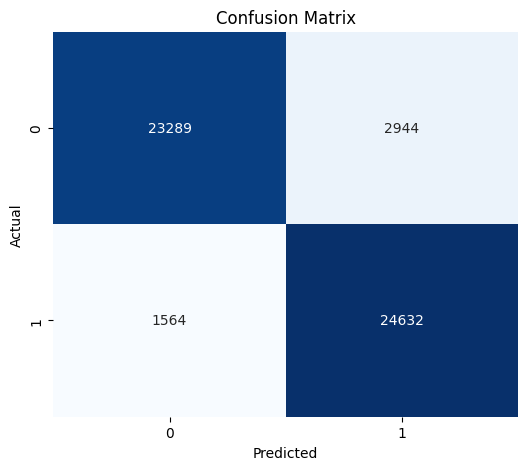

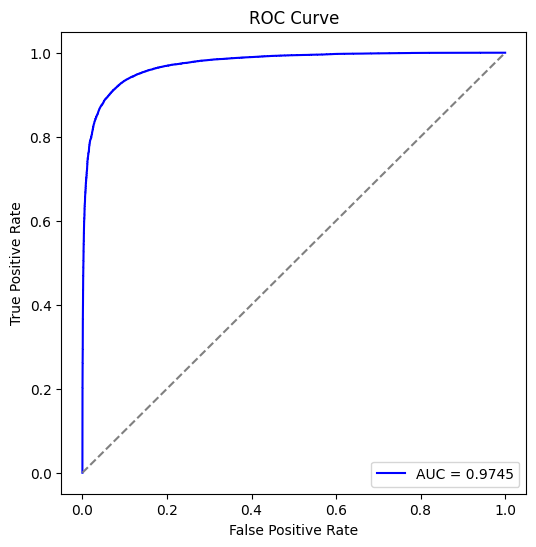

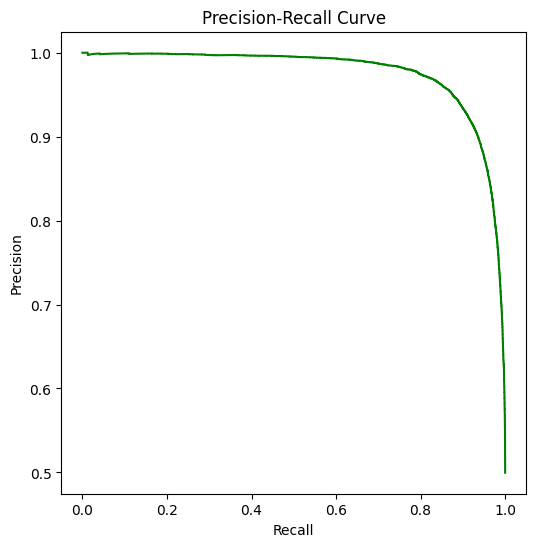

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, precision_recall_curve

# Function to plot training curves with improved visualisation
def plot_training_curves(history):
    epochs = np.arange(1, len(history.history['accuracy']) + 1)

    plt.figure(figsize=(18, 5))

    # Accuracy Plot
    plt.subplot(1, 3, 1)
    plt.plot(epochs, history.history['accuracy'], label='Training Accuracy', marker='o')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy', marker='x')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.xticks(np.arange(1, len(epochs) + 1, step=1))
    plt.ylim(0.75, 1.0)
    plt.legend()

    # Loss Plot
    plt.subplot(1, 3, 2)
    plt.plot(epochs, history.history['loss'], label='Training Loss', marker='o')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss', marker='x')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.xticks(np.arange(1, len(epochs) + 1, step=1))
    plt.ylim(0.0, 0.5)
    plt.legend()

    # AUC-ROC Plot
    plt.subplot(1, 3, 3)
    plt.plot(epochs, history.history['auc'], label='Training AUC', marker='o')
    plt.plot(epochs, history.history['val_auc'], label='Validation AUC', marker='x')
    plt.title('AUC-ROC over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('AUC')
    plt.xticks(np.arange(1, len(epochs) + 1, step=1))
    plt.ylim(0.8, 1.0)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Function to evaluate model performance
def evaluate_model(model, dataset):
    y_true, y_pred, y_probs = [], [], []
    for images, labels in dataset:
        predictions = model.predict(images)
        y_probs.extend(predictions.flatten())  # Store raw probabilities for ROC
        predictions = np.round(predictions).astype(int)
        y_true.extend(labels.numpy())
        y_pred.extend(predictions.flatten())

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc_score = roc_auc_score(y_true, y_probs)

    print("\nEfficientNet-B0 Model Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc_score:.4f}")

    return y_true, y_pred, y_probs

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# ROC Curve
def plot_roc_curve(y_true, y_probs):
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.4f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Precision-Recall Curve
def plot_precision_recall_curve(y_true, y_probs):
    precision, recall, _ = precision_recall_curve(y_true, y_probs)
    plt.figure(figsize=(6, 6))
    plt.plot(recall, precision, color='green')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

# Run the evaluation and plot functions after fine-tuning
plot_training_curves(history_finetune_efficientnet)
y_true, y_pred, y_probs = evaluate_model(model_efficientnet, ds_test)
plot_confusion_matrix(y_true, y_pred)
plot_roc_curve(y_true, y_probs)
plot_precision_recall_curve(y_true, y_probs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


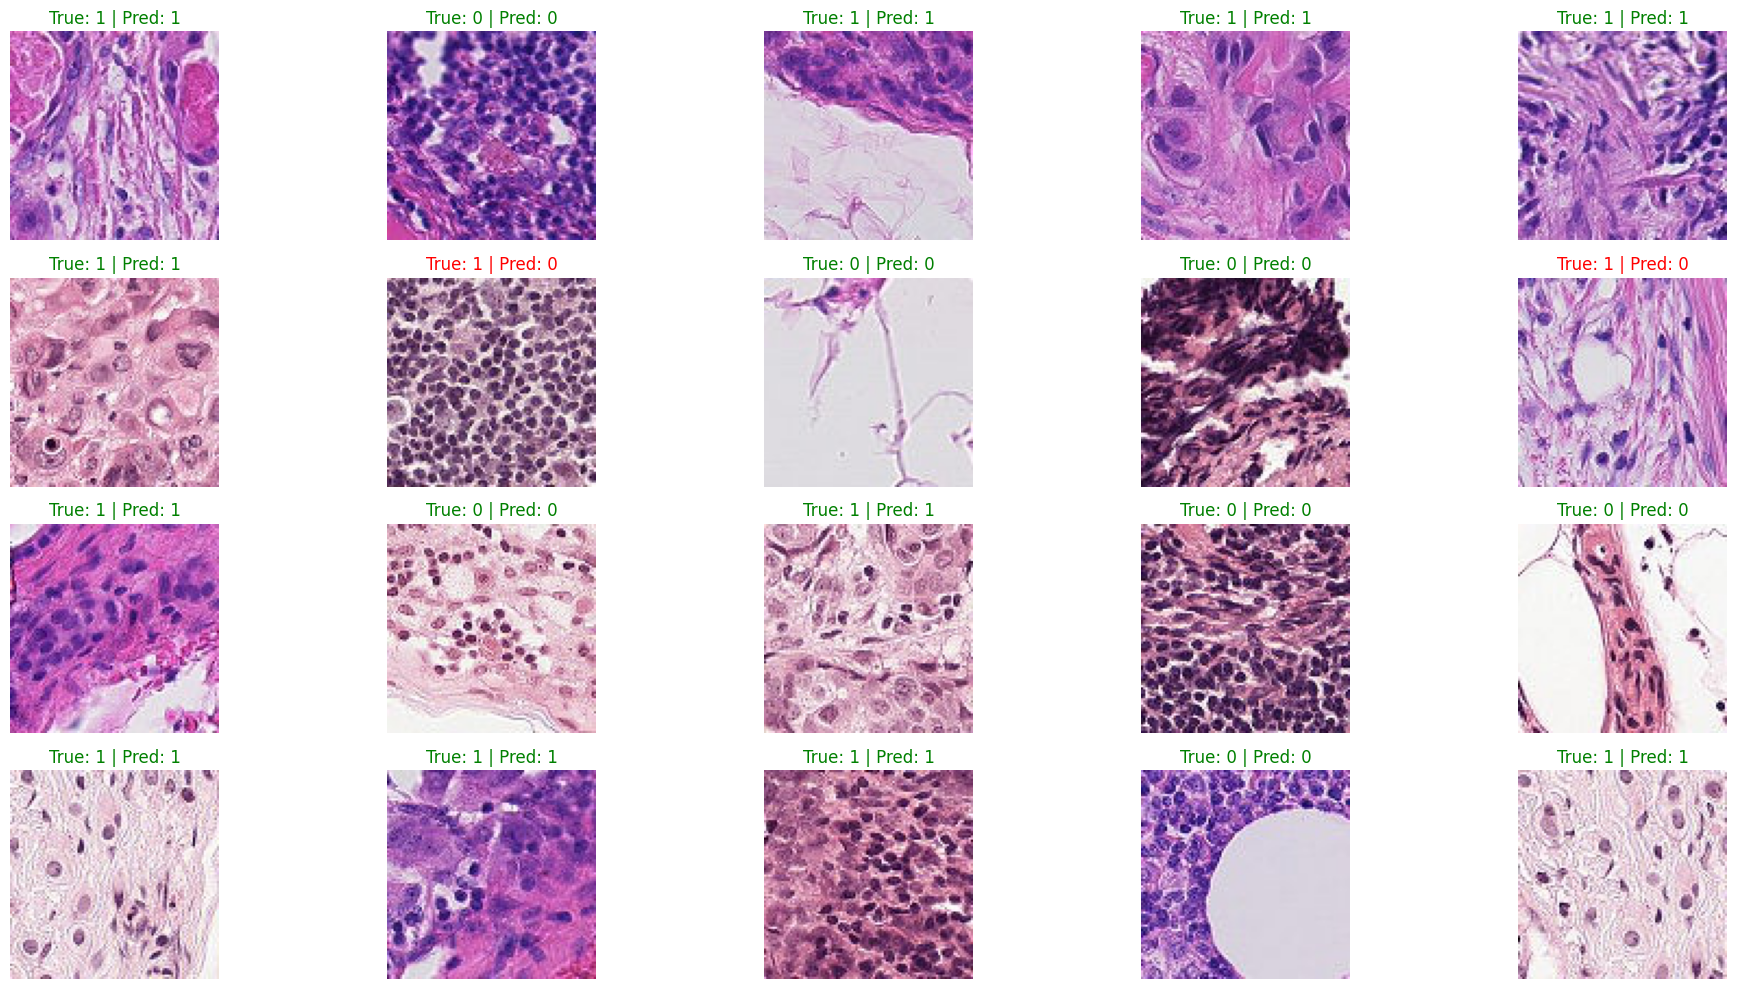

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Function to visualise predictions alongside true labels
def visualize_predictions(model, dataset, num_images=20):
    plt.figure(figsize=(20, 10))
    images_shown = 0
    for images, labels in dataset:
        predictions = model.predict(images)
        preds_rounded = np.round(predictions).astype(int).flatten()
        for i in range(images.shape[0]):
            plt.subplot(4, 5, images_shown + 1)  # Displaying 4x5 grid
            plt.imshow(images[i].numpy())
            true_label = labels.numpy()[i]
            pred_label = preds_rounded[i]
            plt.title(f"True: {true_label} | Pred: {pred_label}",
                      color="green" if true_label == pred_label else "red")
            plt.axis('off')
            images_shown += 1
            if images_shown >= num_images:
                plt.tight_layout()
                plt.show()
                return

# Visualise predictions using the EfficientNet-B0 model
visualize_predictions(model_efficientnet, ds_test)
